<a href="https://colab.research.google.com/github/matheusomendonca/general/blob/main/penalty_shootout_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import List

# set seaborn style
sns.set_theme()

In [2]:
class PenaltyShootoutSimulator:

  def __init__(self,
               first_team: List[float],
               second_team: List[float],
               number_executions: int = 100):
    """ Class constructor.

      Args:
        first_team (List[float]): first team shoot-out ordered list with the
                                  probabilities of each player scoring their
                                  penalty.
        second_team (List[float]): second team shoot-out ordered list with the 
                                   probabilities of each player scoring their
                                   penalty.
    """

    if len(first_team) != len(second_team):
      raise Exception("Teams must have same number of players!")
    else:
      # assign variables    
      self.first_team = first_team
      self.second_team = second_team
      self.number_executions = number_executions
      self.n_players = len(first_team)

      # output
      self.output = {'winner_team': [],
                     'number_rounds': []}

  def simulate(self, verbose: bool = False):
    """Simulates the penalties shootout."""

    # maximum number of shoot-outs in alternating phase when there is a winner
    N = 5

    # simulate number_executions times
    for i in range(self.number_executions):

      if verbose:
        print(f"===Execution {i}===")

      # boolean indicating if there is a winner
      winner = False

      # simulate penalty shootout
      player_idx = 0
      n_rounds = 0
      fist_team_score = 0
      second_team_score = 0
      sudden_death = False
      while not winner:

        # simulate if first team scores a goal in this round
        first_team_goal = (np.random.uniform() <=
                           self.first_team[player_idx % self.n_players])
        fist_team_score += 1. * first_team_goal

        # simulate if second team scores a goal in this round
        second_team_goal = (np.random.uniform() <=
                            self.second_team[player_idx % self.n_players])
        second_team_score += 1. * second_team_goal

        # update round counter
        n_rounds += 1

        if verbose:
          print(f"Round {n_rounds} - Sudden death = {sudden_death}")
          print(f"\tTeam 1, player {player_idx % self.n_players} goal: {first_team_goal}")
          print(f"\tTeam 2, player {player_idx % self.n_players} goal: {second_team_goal}")
          print(f"\tTeam 1 score: {fist_team_score}")
          print(f"\tTeam 2 score: {second_team_score}")

        # check it there is a winner
        remaining_rounds = max(N - n_rounds, 0)
        if remaining_rounds + fist_team_score < second_team_score:

          # first team loss
          winner_team = 'Second team'
          winner = True

          # log output
          self.output['winner_team'].append(winner_team)
          self.output['number_rounds'].append(n_rounds)

          if verbose:
            print(f"Winner team: {winner_team}")

        if remaining_rounds + second_team_score < fist_team_score:

          # second team loss
          winner_team = 'First team'
          winner = True

          # log output
          self.output['winner_team'].append(winner_team)
          self.output['number_rounds'].append(n_rounds)

          if verbose:
            print(f"Winner team: {winner_team}")

        # sudden death indicator
        sudden_death = True if n_rounds >= N else False

        # next player
        player_idx += 1

    # return
    self.output = pd.DataFrame(self.output)

    return self.output

  def generate_experiment_results(self):
    """Plot simulation results and statistics."""

    # plots
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

    # plot patterns
    ax[0].plot(np.arange(1, len(self.first_team)+1), 100*self.first_team, 'o',
               label='First team')
    ax[0].plot(np.arange(1, len(self.second_team)+1), 100*self.second_team, '*', 
               label='Second team')
    ax[0].set_xlabel("Player, in kick order")
    ax[0].set_ylabel("Probability of scoring a goal (%)")
    ax[0].legend()

    # frequency of wins
    (self.output['winner_team'].value_counts()/n_executions*100).plot(kind='bar', ax=ax[1])
    ax[1].set_ylabel("% of wins")
    ax[1].tick_params(labelrotation=0)

    # histogram
    self.output['number_rounds'].hist(density=True, bins=17, ax=ax[2])
    ax[2].set_xlabel("Number of rounds")
    ax[2].set_ylabel("Frequency")

    plt.show()

    # print number of kicks statistics
    print("\n\nNumber of rounds distribution:\n")
    print(self.output['number_rounds'].describe())

In [3]:
def generate_constant_pattern(level: float = 0.6, length: int = 11):
  """ Generate constant pattern for players' probabilities of scoring a goal.

    Args:
      level (float): probability of scoring a goal.
      length (int): list length.

    Return:
      probabilities (list): list of probabilities.
  """

  probabilities = np.linspace(start=level,
                              stop=level,
                              num=length)
  
  return probabilities

In [4]:
def generate_linear_pattern(start: float = 0.6,
                            stop: float = 0.9,
                            length: int = 11):
  """ Generate linear pattern (ascending or descending) for players' 
      probabilities of scoring a goal.

    Args:
      start (float): start level for probability of scoring a goal.
      stop (float): stop level for probability of scoring a goal.
      length (int): list length.

    Return:
      probabilities (list): list of probabilities.
  """

  probabilities = np.linspace(start=start,
                              stop=stop,
                              num=length)
  
  return probabilities

In [5]:
def generate_random_pattern(start: float = 0.6,
                            stop: float = 0.9,
                            length: int = 11):
  """ Generate random pattern for players' probabilities of scoring a goal.

    Args:
      start (float): start level for probability of scoring a goal.
      stop (float): stop level for probability of scoring a goal.
      length (int): list length.

    Return:
      probabilities (list): list of probabilities.
  """

  probabilities = np.random.uniform(low=start,
                                    high=stop,
                                    size=length)
  
  return probabilities

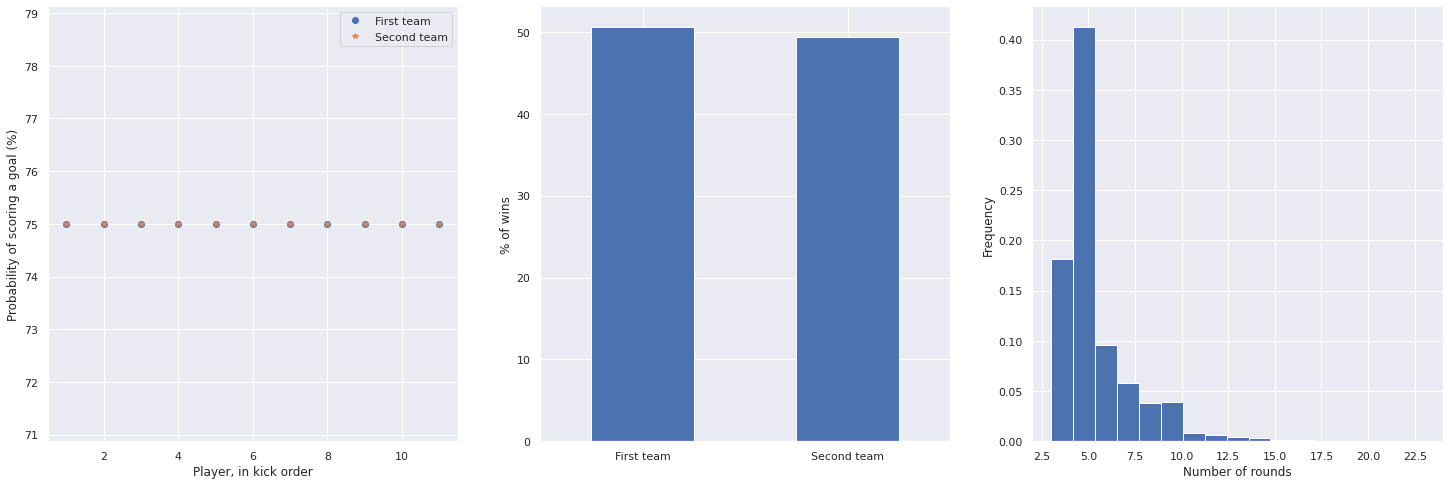



Number of rounds distribution:

count    10000.000000
mean         5.591700
std          1.880677
min          3.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         23.000000
Name: number_rounds, dtype: float64


In [6]:
# scenario: equal probabilities
first_team = generate_constant_pattern(level=0.75)
second_team = generate_constant_pattern(level=0.75)
n_executions = 10000

# instantiate simulation
sim = PenaltyShootoutSimulator(first_team=first_team,
                               second_team=second_team,
                               number_executions=n_executions)

# simulate
output = sim.simulate(verbose=False)

# generate results
sim.generate_experiment_results()

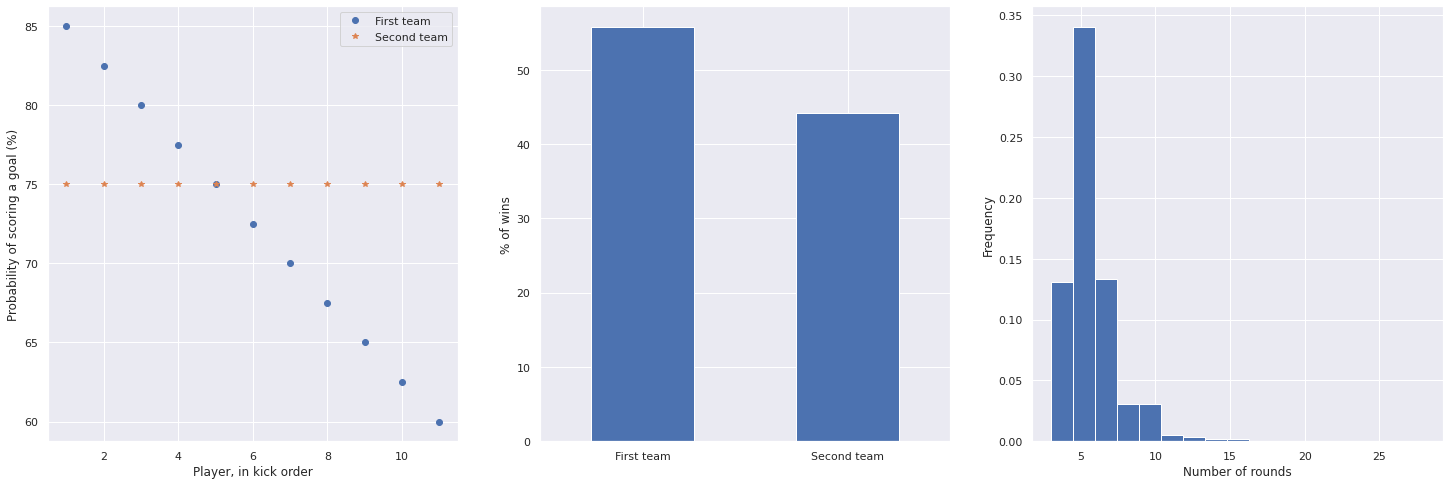



Number of rounds distribution:

count    10000.000000
mean         5.555800
std          1.709789
min          3.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         28.000000
Name: number_rounds, dtype: float64


In [7]:
# scenario
first_team = generate_linear_pattern(start=0.85, stop=0.6)
second_team = generate_constant_pattern(level=0.75)
n_executions = 10000

# instantiate simulation
sim = PenaltyShootoutSimulator(first_team=first_team,
                               second_team=second_team,
                               number_executions=n_executions)

# simulate
output = sim.simulate(verbose=False)

# generate results
sim.generate_experiment_results()

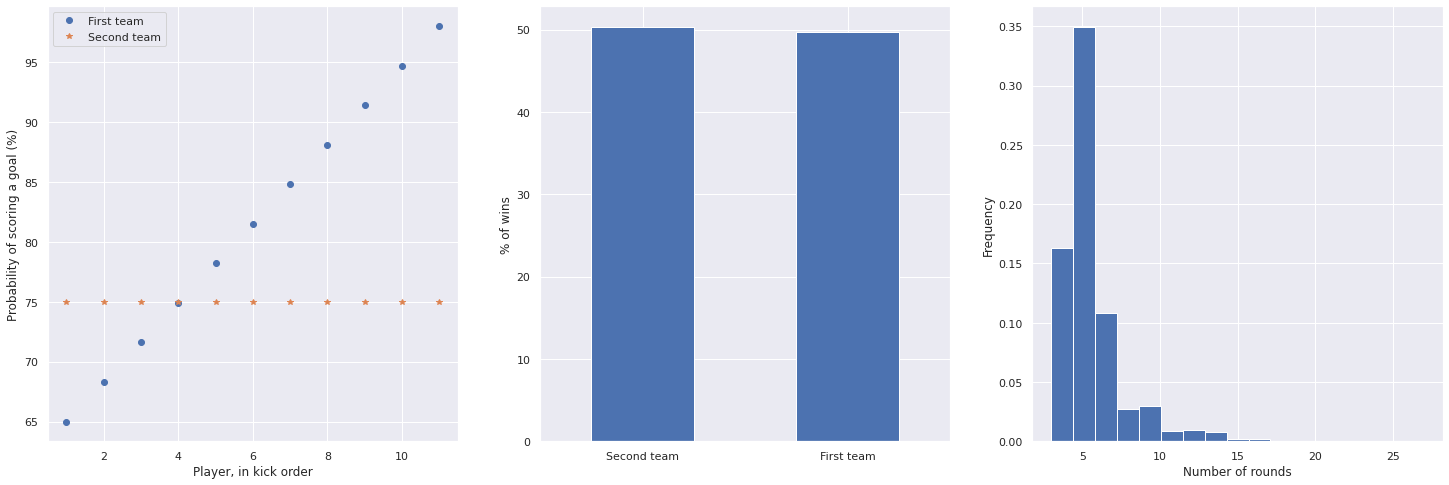



Number of rounds distribution:

count    10000.000000
mean         5.607300
std          2.086749
min          3.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         27.000000
Name: number_rounds, dtype: float64


In [8]:
# scenario
first_team = generate_linear_pattern(start=0.65, stop=0.98)
second_team = generate_constant_pattern(level=0.75)
n_executions = 10000

# instantiate simulation
sim = PenaltyShootoutSimulator(first_team=first_team,
                               second_team=second_team,
                               number_executions=n_executions)

# simulate
output = sim.simulate(verbose=False)

# generate results
sim.generate_experiment_results()

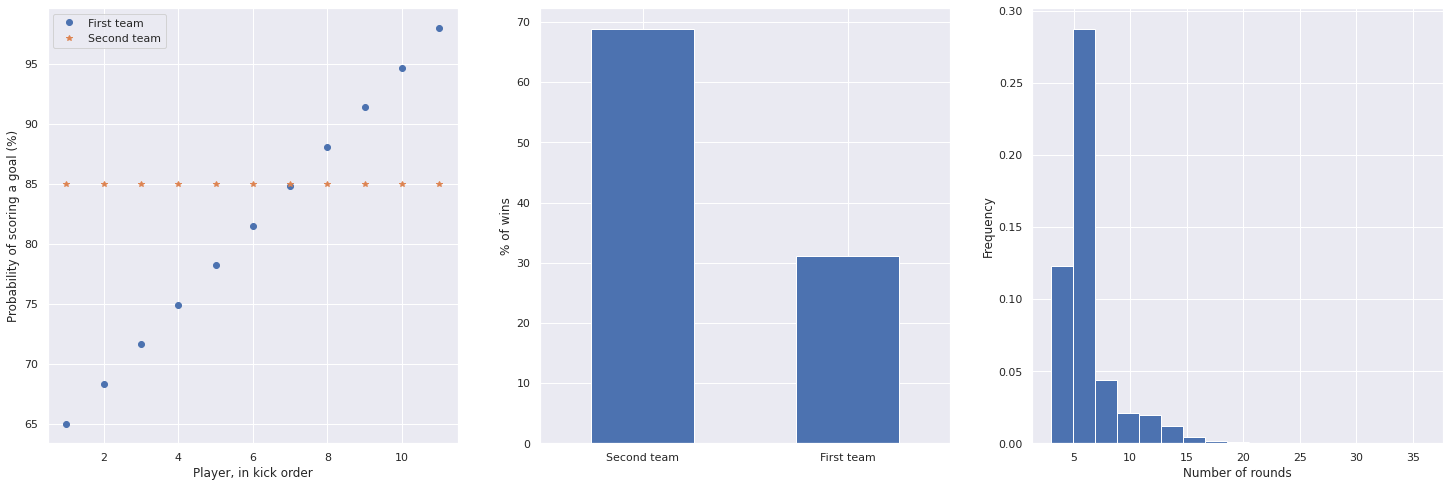



Number of rounds distribution:

count    10000.000000
mean         5.839700
std          2.603052
min          3.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         36.000000
Name: number_rounds, dtype: float64


In [9]:
# scenario
first_team = generate_linear_pattern(start=0.65, stop=0.98)
second_team = generate_constant_pattern(level=0.85)
n_executions = 10000

# instantiate simulation
sim = PenaltyShootoutSimulator(first_team=first_team,
                               second_team=second_team,
                               number_executions=n_executions)

# simulate
output = sim.simulate(verbose=False)

# generate results
sim.generate_experiment_results()

In [10]:
# experiment: check % increase in probability over another team
step_grid = np.linspace(start=0.0, stop=0.20, num=21)

# run scenarios
n_executions = 10000
reference_level = 0.6
first_team_win_probs = []
for step in step_grid:

  # teams probabilities
  first_team = generate_constant_pattern(level=reference_level+step)
  second_team = generate_constant_pattern(level=reference_level)

  # instantiate simulation
  sim = PenaltyShootoutSimulator(first_team=first_team,
                                second_team=second_team,
                                number_executions=n_executions)
  
  # simulate
  output = sim.simulate(verbose=False)
  first_team_win_probs.append(sum(output['winner_team'] == 'First team')/n_executions)

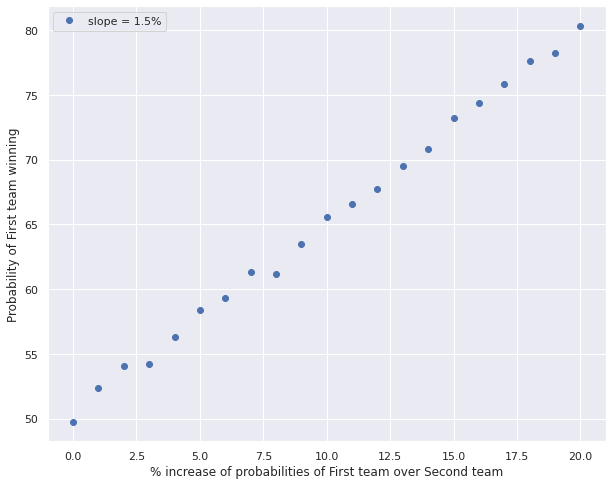

In [11]:
# plot % increase
slope = np.mean(np.diff(np.array(first_team_win_probs))/0.01)
plt.figure(figsize=(10, 8))
plt.plot(step_grid*100,
         np.array(first_team_win_probs)*100,
         'o',
         label=f"slope = {slope:.1f}%")
plt.xlabel("% increase of probabilities of First team over Second team")
plt.ylabel("Probability of First team winning")
plt.legend()
plt.show()